In [1]:
import os
import pandas as pd
import numpy as np
import scipy
import statsmodels
import sklearn
import sys

print("Python:", sys.version)
for i in [pd, np, scipy, statsmodels, sklearn]:
    print(i.__name__, i.__version__)  

Python: 3.10.9 (main, Jan 19 2023, 01:50:55) [GCC 8.4.0]
pandas 2.1.1
numpy 1.26.1
scipy 1.11.3
statsmodels 0.14.0
sklearn 1.3.2


In [2]:
# 시각화 패키지

import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분석 중급 문제 1번

소프트웨어 품질관리팀에 있는 데이터분석가 지희는 소프트웨어의 결함을 선제적으로 예방하기 위한 연구를 진행중에 있습니다. 

이를 위해 그 동한 소프트웨어 품질검사 이력을 수집하여 다음과 같은 데이터셋을 만들어 냈습니다.

지희를 도와 다음 과제를 해결해보세요.

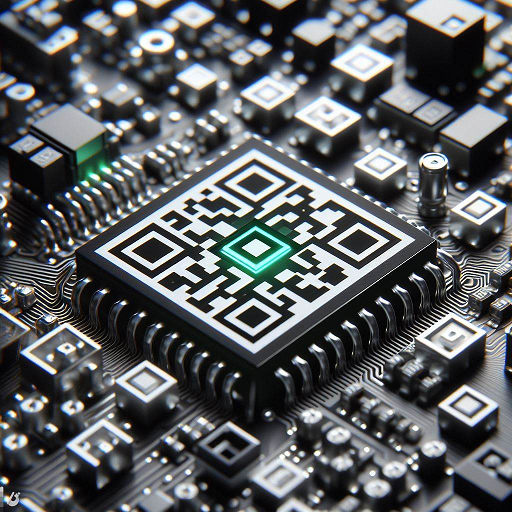

|컬럼명|설명|데이터형식|
|---|----|----------|
|Seq|일련번호|정수형|
|loc|코드 라인수|실수형|
|v(g)|구조적 복잡도|실수형|
|ev(g)|본질적 복잡도|실수형|
|iv(g)|설계 복잡도|실수형|
|uniq_Op|연산자 종류수|실수형|
|uniq_Opnd|피연산자 종류수|실수형|
|total_Op|연산자 개수|실수형|
|total_Opnd|피연산자 개수|실수형|
|branchCount|브랜치수|정수형|실수형|
|defects|결함여부, false:정상, true: 결함|문자형|

데이터셋의 명칭은 **sw**이고 파일명은 sw.csv 입니다. 

# 전처리


**Step Pre-1.**

uniq_Op, uniq_Opnd, total_Op, total_Opnd, branchCount에 하나라도 '?'(물음표)가 있는 행은 제거합니다.

제거한 후에 연속형 변수 형식으로 변환합니다.

Hint] 제거 후 데이터수는 10,880입니다.

# 문제 1

소프트웨어의 유형을 파악하여, 유형에 따른 결함의 양상을 확인하고자 합니다. 이를 위해 데이터셋에서 군집화를 수행합니다. 

유형에 따른 결함의 양상을 확인해봅니다.

**Step 1-1**

(**sw**셋에서) uniq_Op, uniq_Opnd, total_Op, total_Opnd 변수에 0이 하나라도 있는 행은 제외하여 ,

**prob1** 데이터셋을 만듭니다.

**Step1-2**

연속형 변수의 분포를 파악하기 위해 히스토그램을 출력해보았더니, 아래와 같이 좌측으로 치우침이 심했습니다.

데이터의 치우침 현상에 의한 불균현 현상을 완화하고자 로그 변환을 합니다.
```
loc, v(g), ev(g), iv(g), uniq_Op, uniq_Opnd, total_Op, total_Opnd, branchCount
```

**prob1**에서 위에서 제시한 변수들을 자연 로그 함수로 변환을 하여 원래 변수명에 입력합니다.

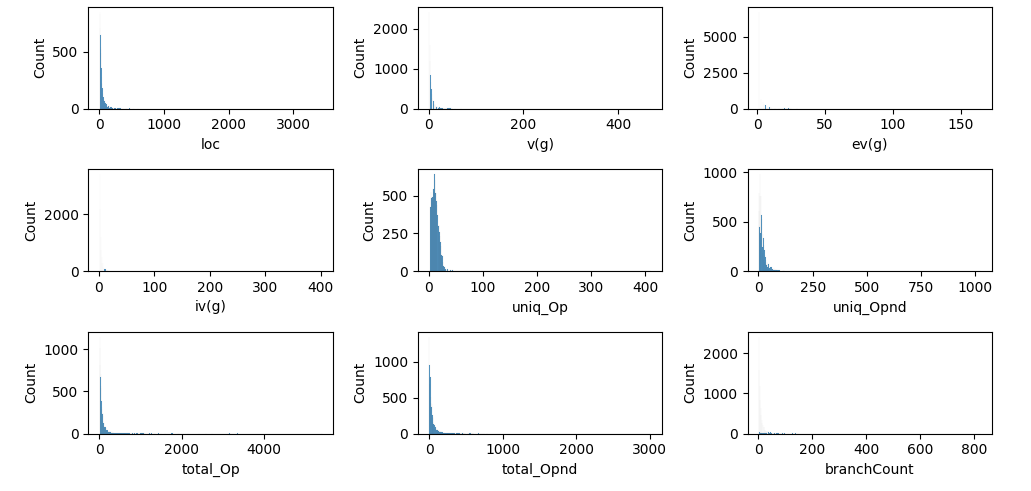

**Python 가이드**
```
로그 변환 시, numpy 패키지에서 제공하는 기능을 활용합니다.
```

**Step1-3**

loc, v(g), ev(g), iv(g), uniq_Op, uniq_Opnd, total_Op, total_Opnd, branchCount 변수들을 각각의 최소값은 0, 최대값은 10으로 정규화하여,

동일한 변수명에 입력합니다.

**Python 가이드**
```
sklearn.preprocessing에서 제공하는 기능을 사용합니다.

문제에서 제시한 설정 외에는 기본 설정을 사용합니다.
```

**Step1-4**

군집의 수를 4개에서 7까지 KMeans 군집화를 수행해보고 실루엣 점수(Silhouette score)로 측정했을 때, 가장 성능이 좋은 군집의 수 **A**를 구합니다.

각각의 KMeans 군집화 과정은 초기의 중심점(Centroid)를 임의의 지점으로 잡히게 설정을 하고 50번의 군집화를 수행했을 때 최소의 군집화에 의한

손실(Loss)이 있는 군집화 결과를 채택하도록 설정합니다.

**입력변수**

loc, v(g), ev(g), iv(g), uniq_Op, uniq_Opnd, total_Op, total_Opnd, branchCount 

 ※ 입력데이터 구성 시, 제시한 변수 순서에 맞게 구성합니다.

**실루엣 스코어(Silhouette score)**

  $S = \frac{1}{N}\sum_{i∈prob1}\frac{b(i) - a(i)}{max(a(i), b(i))}$, 

  a(i): i번째 샘플과 동일한 군집내의 샘플간 거리의 평균(자신을 제외)

  b(i): i번째 샘플과 이웃한 군집(군집의 소속 샘플간의 거리의 평균이 최소)의 샘플들과의 거리의 평균,

  N: 샘플수

**Python 가이드**
```
실루엣 점수 측정은 sklearn.metrics에 있는 기능을 사용합니다.
KMeans 클러스터링은 sklearn.cluster에 있는 기능을 사용하고, init='random', random_state=123 으로 설정합니다.

문제에서 제시한 설정 외에는 기본설정을 사용합니다.
```

**Step1-5**

Step 1-4에서의 최적의 군집화 결과에서의 군집 별

defects의 비율이 가장 높은 것을 **B**

defects의 비율이 가장 낮은 것을 **C**

B, C를 구하세요

A + B + C의 값을 소수점 셋째 자리에서 반올림하여 둘째 자리까지 구합니다.

# 문제 2

defects를 분류하는 모델을 로지스틱 회귀모델을 이용하여 만듭니다. 

입력 변수간에 다중공선성을 제거했을 때와 그렇지 않을 때와의 성능을 비교해봅니다.

**Step 2-1**

(**sw**셋에서) uniq_Op, uniq_Opnd, total_Op, total_Opnd 변수에 0이 하나라도 있는 행은 제외하여 ,

**prob2** 데이터셋을 만듭니다.

**Step 2-2**

**prob2**을 Seq가 5의 배수가 아니면 **prob2_train**셋으로 5의 배수이면 **prob2_test**셋으로 나눕니다.

**prob2_train**은 Seq기준으로 오름차순 정렬합니다.

**Step 2-3**

loc, v(g), ev(g), iv(g), uniq_Op, uniq_Opnd, total_Op, total_Opnd, branchCount 변수들을 

각각의 변수들을 평균은 0, 표준편차은 1이 되도록 

**prob2_train**을 표준화하여 동일한 변수명에 입력합니다.

**prob2_test**는 **prob2_train**을 표준화했던 동일한 설정으로 표준화하고, 마찬가지로 동인한 변수명에 입력합니다.


**Python 가이드**
```
sklearn.preprocessing에서 제공하는 기능을 사용합니다.

문제에서 제시한 설정 외에는 기본설정을 사용합니다.
```

**Step 2-3**

**prob2_train**으로 defects를 대상 변수로 하는 로지스틱 회귀 모델을 다음 요건대로 학습합니다.

로지스틱 회귀모델은 규제 계수의 역수는 1로 설정합니다.

**입력 변수**

loc, v(g), ev(g), iv(g), uniq_Op, uniq_Opnd, total_Op, total_Opnd, branchCount

※ 입력 데이터를 제시한 변수 순서대로 구성합니다.

**Python 가이드**
```
sklearn.linear_model.LogisticRegression, random_state=123, solver='lbfgs' 로 설정합니다.

문제에서 제시하지 않은 설정은 기본 설정을 따릅니다.
```

**Step 2-4**

**Step 2-3**에서 학습한 모델을 **prob2_test**을 대상으로 아래 성능 지표를 측정하고, 이 수치를 A라고 합니다.


**성능 지표**

$\frac{2×Precision×Recall}{Precision + Recall}$

**Step 2-5**

**prob2_train**에서 loc, v(g), ev(g), iv(g), uniq_Op, uniq_Opnd, total_Op, total_Opnd, branchCount 변수셋을 시작으로,

각각의 변수의 VIF(Variance Inflation Factor)를 측정하여 VIF의 최대값이 12이상이면 VIF가 최대인 변수를 제외시키고

남은 변수를 대상으로 이 과정을 반복하고, 그렇지 않으면 멈춥니다. 

제외 과정에서 변수의 순서가 바뀌지 않도록 합니다.

제외되지 않고 남은 변수셋을 **NonCol**이라고 칭합니다.

VIF 측정은 절편이 없는 회귀모델을 사용합니다.

**Python 가이드**
```
statsmodels.stats..outliers_influence에서 제공하는 기능을 사용합니다.

문제에서 제시한 설정 외에는 기본설정을 사용합니다.
```

**Step 2-6**

**prob2_train**으로 defects를 대상 변수로 하는 로지스틱 회귀 모델을 다음 요건 대로 학습합니다.

로지스틱 회귀모델은 규제 계수의 역수는 1로 설정합니다.

**입력 변수**

   **NonCol** 변수셋

**Python 가이드**
```
sklearn.linear_model.LogisticRegression, random_state=123, solver='lbfgs' 로 설정합니다.

문제에서 제시하지 않은 설정은 기본 설정을 따릅니다.
```

**Step 2-7**

**Step 2-6**에서 학습한 모델을 **prob2_test**을 대상으로 아래 성능 지표를 측정하고, 이 수치를 **B**라고 합니다.


성능 지표:

$\frac{2×Precision×Recall}{Precision + Recall}$

A + B를 소수 셋째 자리에서 반올림하여 둘째 자리까지 구하세요.

# 문제 3

uniq_Op, uniq_Opnd, total_Op, total_Opnd 변수가 0이 되는 경우는 데이터에 오류로 인한 것입니다. 

0인 값들을 보간하고, defects를 예측하는 모델을 앙상블 기법인 Random Forest 모델으로 만들어 봅니다.

**Step 3-1**

**sw**셋을 Seq를 5로 나누어 나머지가 0이 아니면,  **prob3_train**으로 나머지가 0이면, **prob3_test**로 나눕니다.

**prob3_train**은 Seq기준으로 오름차순 정렬합니다.

**Step 3-2**

**prob3_train**으로 Random Forest 모델을 아래 설정으로 defects를 대상 변수로 학습합니다.


|하이퍼파라메터(Hyper Parameter)|설정|
|------|---|
|트리의 수|200|
|트리의 최대 깊이|6|
|노드 분기에 필요한 최소 샘플수|32|
|랜덤시드|123|

**입력변수**
    
loc, v(g), ev(g), iv(g), uniq_Op, uniq_Opnd, total_Op, total_Opnd, branchCount 

※ 입력 데이터를 제시한 변수 순서대로 구성합니다.

**Python 가이드**
```
sklearn.ensemble 에 있는 기능으 사용합니다.
```

**Step 3-3**

**Step 3-2**에서 학습한 모델을 **prob3_test**으로 다음 성능 지표를 측정하여 이 값을 **A**라고 합니다.

**성능지표**

$\frac{TP + TN}{TP + TN + FP + FN}$, TP: True Positive, TN: False Positive, FP: False Positive, FN: False Negative

**Step 3-4**

**prob3_train**에서 uniq_Op가 0이 아닌 행들을 뽑아 입력 변수를 loc, v(g), ev(g), iv(g), branchCount로 하고, 대상변수를 uniq_Op로 하여,

선형회귀모델을 학습합니다. 

**prob3_train**의 uniq_Op가 0인 값들을 이 선형회귀모델의 예측값으로 바꿉니다. 

**prob3_test**에 대해서도 uniq_Op가 0인 값들을 이 선형회귀모델의 예측값으로 바꿉니다.

**Python 가이드**
```
sklearn.linear_model.LinearRegression을 활용합니다.
```

**Step 3-5**

**Step 3-4**의 과정을 uniq_Op 대신에 uniq_Opnd, total_Op, total_Opnd에 대해서도 수행합니다.

즉 **Step 3-4**를 포함하여 4개의 변수의 0인 값을 처리하는 과정을 수행하는 것입니다.

**prob3_train**를 Seq에 대해 오름차순 정렬합니다.

**Step 3-6**

**prob3_train**과 uniq_Op, uniq_Opnd, total_Op, total_Opnd의 값이 0인 값을 처리한 후에 


Random Forest 모델을 아래 설정으로 defects를 대상 변수로 학습합니다.


|하이퍼파라메터(Hyper Parameter)|설정|
|------|---|
|트리의 수|200|
|트리의 최대 깊이|6|
|트리 노드 분기에 필요한 최소 샘플수|32|
|랜덤 시드|123|


**입력변수**
    
loc, v(g), ev(g), iv(g), uniq_Op, uniq_Opnd, total_Op, total_Opnd, branchCount 

※ 입력 데이터를 제시한 변수 순서대로 구성합니다.

**Python 가이드**
```
sklearn.ensemble 에 있는 기능으 사용합니다.
```


**Step 3-7**

**prob3_test**에서 uniq_Op, uniq_Opnd, total_Op, total_Opnd의 값이 0인 값을 처리한 후에 

**Step 3-6** 학습한 모델의 성능을 측정하여, 이 값을 **B**로 합니다.


**성능지표**

$\frac{TP + TN}{TP + TN + FP + FN}$, TP: True Positive, TN: False Positive, FP: False Positive, FN: False Negative


A + B의 값을 소수점 셋째 자리에서 반올림하여 둘째 자리까지 구합니다.